In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,7)

In [2]:
# reading the data and showing...
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# showing basic info aout the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# replacing '?' as missing values
df.replace(to_replace='?', value=np.nan, inplace=True)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
# cchecking the percentage of missing rows to all rows
per = round((1843 / df.shape[0])*100,3)
print(f'The Missing value percentage {per}%')

The Missing value percentage 5.66%


The percentage of null values in total: `5.66 %`
Now the rule says i can drop null values row if the percentage is equal to ot lessthat `5%`, but here the rule is almost satisfying, also i can't fill those by any fillna methode, the null values are present on the workclass, occupation, and native-country, althoug i can assume the country but the other two will be wron information if i put most-frequnt or other null value methode.

I will just drop those rows.

In [7]:
# droping all the missing values
df.dropna(axis=0, inplace=True)

#### Checking the numerical colums at first, because the categorical column will be encoded in the model creation time. the main problem is dealing with `numerical` columns because these column can contain outliars and bad values

In [10]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_col = df.select_dtypes(include=['int64', 'float64']).columns
# showing the numerical columns only
num_col

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

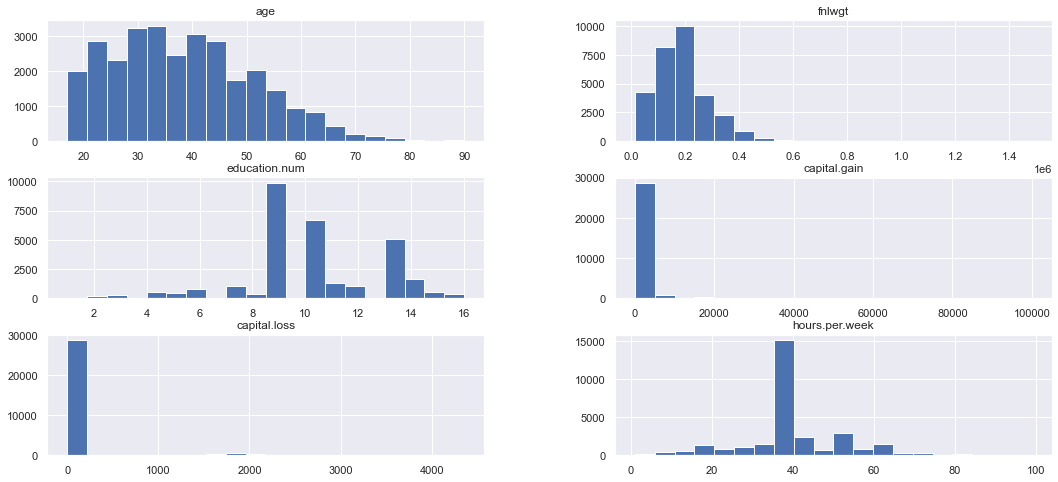

In [11]:
# plotting them together to get ovierviews
# plotting numerical column only
num_df.hist(figsize=(18,8), bins=20);

From this plot we cna see the `capital_loss` and `capital_gain` have most of the values are near `zero` and it speard to long range.

I have to drop these column as it does not holding any information for the model.

The column `fnlwgt` having very low range values like ` o to 1.4`, this will also not be informative when the other values are having very high range of numbers. droping this column will be better.

And other three column have somewhat normal data. In the data we have a column called `education` which represent the education of individuals. also having a numerical column called `education_num`. both contain close same information, it just numerical represent of that column. we can also drop this column.

In [12]:
# descriptive of num df columns
num_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* `age` - most of the people age are between `20 to 50`
* `fnlwgt` - this column contain very low range of values.
* `education_num` - This column consist of the euducation have for each people in numerical form. 
* `capital.gain`, `capital.loss` - these two column have huge outliears. have to drop these columns
* `hours.per.week` - how much each people works in a week

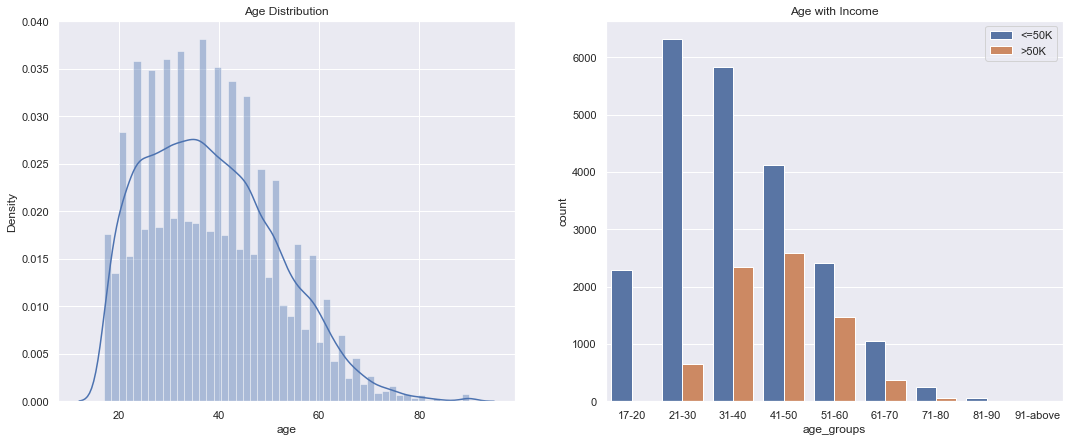

In [13]:
# crating another column for `age` for plotting
# creating `age group` column
age_group = [17, 21, 30, 40,  50, 60, 70, 80, 90,  np.inf]
age_lbl = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-above']
# creating new column
df['age_groups'] = pd.cut(df['age'], bins=age_group, labels=age_lbl)

# ploting the age group column
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.distplot(df['age']);  # normal age column
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.countplot(x='age_groups', data=df, hue='income');
plt.title('Age with Income')
plt.legend(loc='upper right');

Most people age are `20 to 50` on the dataset. and the most of people those age are between `40 to 50` are income more than `50k`

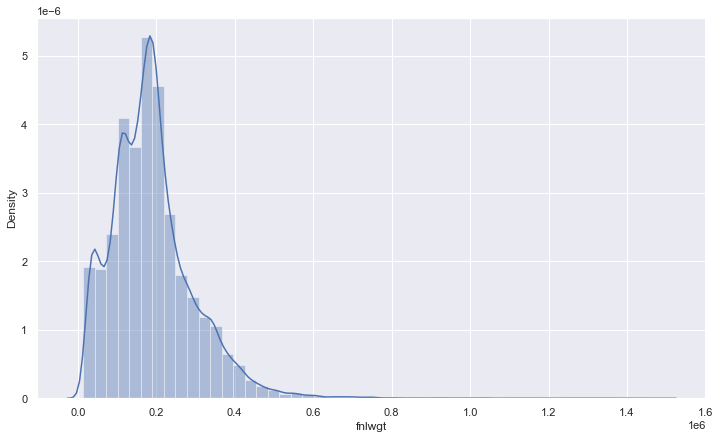

In [14]:
# checking the 'fnlwgt' or final weight column
sns.distplot(df['fnlwgt']);

This `fnlwgt` column have values upto `1.4` with outliars, the mostof majority of the data is lie under `0.4` as this column has very low value, and also many `zero`. it will better to drop this column.
This column have very smaller range values comare to other values. drop will be better for this.


In [15]:
df.drop('fnlwgt', axis=1, inplace=True)
print('Column droped')

Column droped


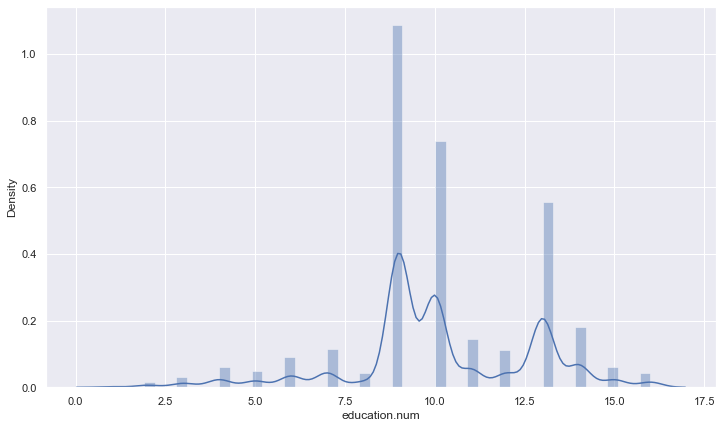

In [16]:
# checking the education.num column
sns.distplot(df['education.num']);

As i have another column which consist similar information, so i will drop this column.

In [17]:
df.drop('education.num', axis=1, inplace=True)
print('column droped')

column droped


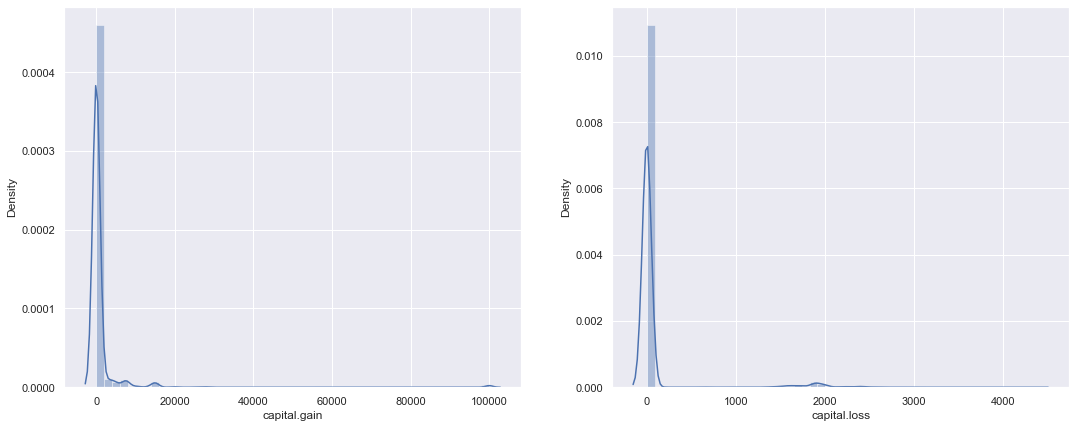

In [18]:
# capital gain and capital loss columns
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.distplot(df['capital.gain']);
plt.subplot(1,2,2)
sns.distplot(df['capital.loss']);

In [19]:
# droping these column
df.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)
print('Column Droped')

Column Droped


Max hour:  99
Min hour:  1
Total Hours in a week: 168


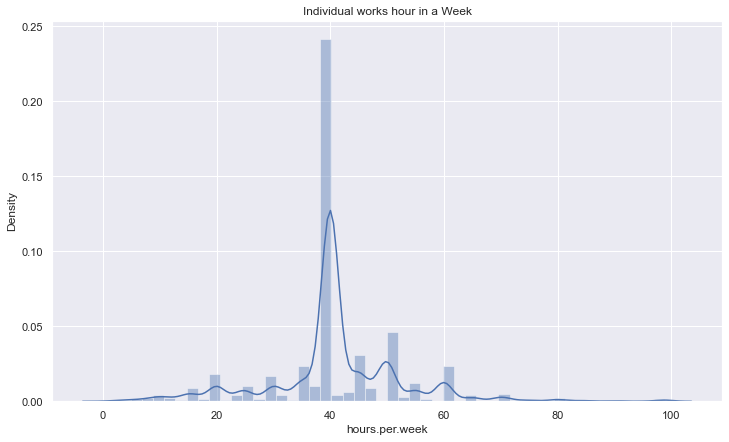

In [20]:
# checking the hours.per.week column
sns.distplot(df['hours.per.week']);
plt.title('Individual works hour in a Week');

# checking the max and min value
print('Max hour: ',df['hours.per.week'].max())
print('Min hour: ',df['hours.per.week'].min())
print(f'Total Hours in a week: {7*24}' )

The value is long tail to right side, adn i can use `quantile` to remove these value. but for come up that decision, i need further permission. This column will be valueable because the more a person work,it is likely to earn more money. 


In [21]:
# find the 99quantile value form hours per week column
q = df['hours.per.week'].quantile(q = 0.99) # it return a single value
q

80.0

Max hour:  78
Min hour:  1
Total Hours in a week: 168


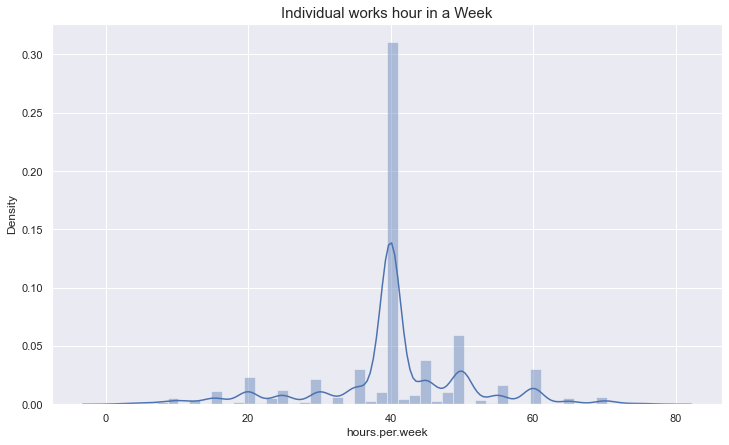

In [23]:
# repleacing this value to dataframe and crearting another dataframe
df1 = df[df['hours.per.week']<q]
# checking the hours.per.week column
sns.distplot(df1['hours.per.week']);
plt.title('Individual works hour in a Week', fontsize=15);

# checking the max and min value
print('Max hour: ',df1['hours.per.week'].max())
print('Min hour: ',df1['hours.per.week'].min())
print(f'Total Hours in a week: {7*24}' )

I have to drop most of numericl columns because most of them having bad data. 

## Checking Categorical columns


In [25]:
cat_col = df1.select_dtypes(include=['category', 'object']).columns
cat_col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income',
       'age_groups'],
      dtype='object')

In [28]:
# creating a function to plot category columns
# creating function to plot categorical columns
def cat_plot(col,hue='income'):
    fig, ax1 = plt.subplots(figsize=(20,10))
    graph = sns.countplot(ax=ax1,x=col, data=df1,hue=hue);
    plt.xlabel(col, fontsize=15);
    plt.ylabel('Count', fontsize=15);
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90, fontdict={'fontsize': 15, 
                                                                       'horizontalalignment':'center'});
    for p in graph.patches:
        height = p.get_height();
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontdict={'fontsize': 16, 
                                                                       'horizontalalignment':'center'});

posx and posy should be finite values
posx and posy should be finite values


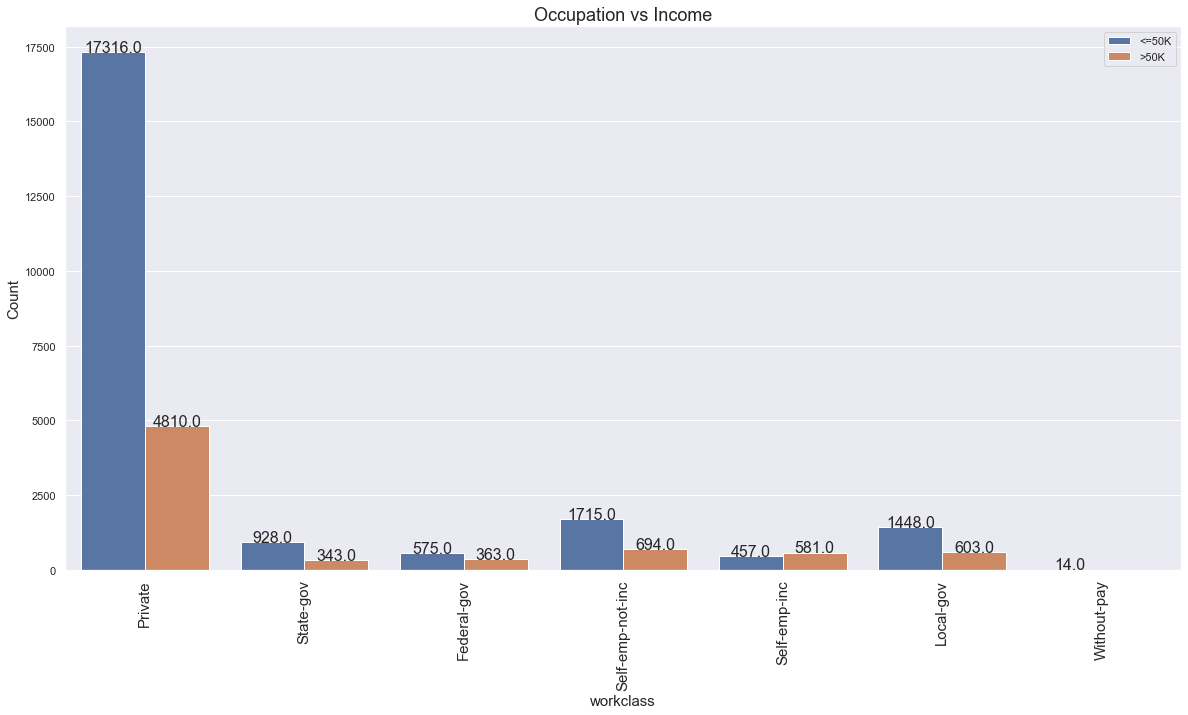

In [31]:
# plotting income vs workclass
cat_plot('workclass')
plt.title('Occupation vs Income', fontsize=18)
plt.legend(loc='upper right');

Most of the people woorks on private in the dtaset. and it look like it have the lowest ratio to earn more than 50k than other sector workclass

posx and posy should be finite values
posx and posy should be finite values


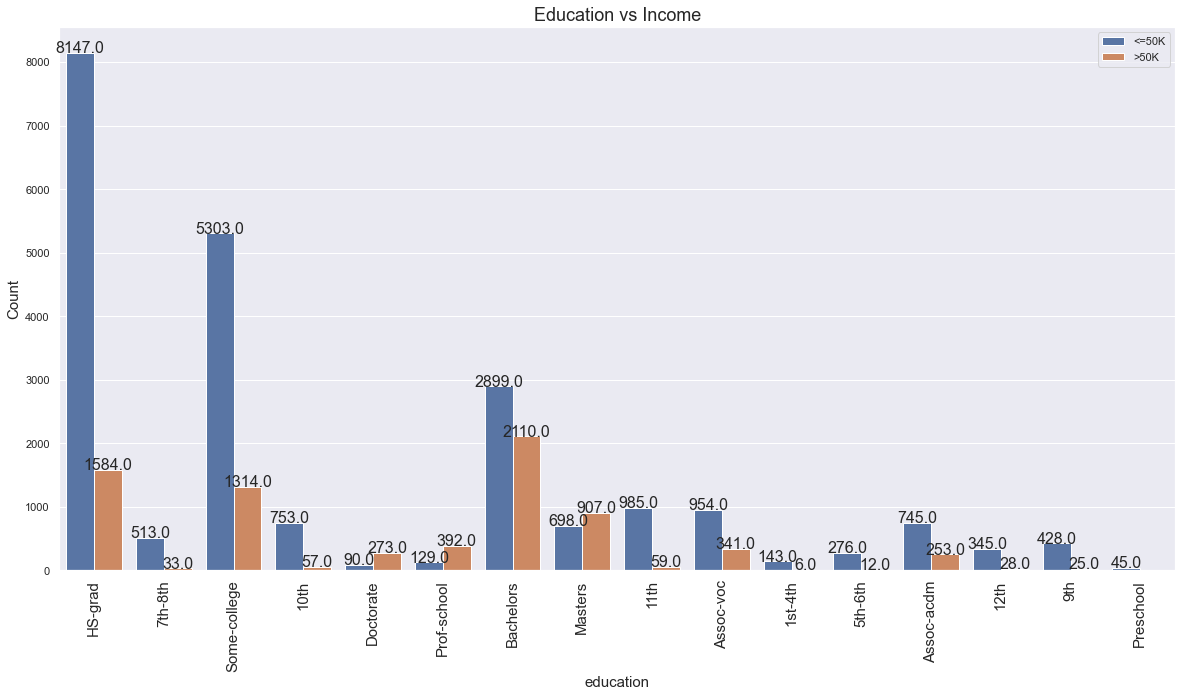

In [34]:
# plotting the 'education' column
cat_plot('education')
plt.title('Education vs Income', fontsize=18)
plt.legend(loc='upper right');

Here the label are too much speard like most of them have similar meaning like `HS-grad` and `12th`, grouping them will provied better result.

In [36]:
df1['education'].value_counts()

HS-grad         9731
Some-college    6617
Bachelors       5009
Masters         1605
Assoc-voc       1295
11th            1044
Assoc-acdm       998
10th             810
7th-8th          546
Prof-school      521
9th              453
12th             373
Doctorate        363
5th-6th          288
1st-4th          149
Preschool         45
Name: education, dtype: int64

In [37]:
# creating function to replace the similar qualification 
def edu_rep(text):
    school = ['HS-grad', '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
    college = ['Some-college','Bachelors','Prof-school']
    master = ['Masters', 'Doctorate']
    associ = ['Assoc-voc', 'Assoc-acdm']
    # checking the value that is inside of edu list
    if text in school:
        return 'School Level'
    elif text in college:
        return 'College Level'
    elif text in master:
        return 'Masters'
    elif text in associ:
        return 'Associate'
    
    
# applying the function and making another column
df1['Education Level'] = df1['education'].apply(lambda x: edu_rep(x))

# comparing both of column that it workd right
df1[['education', 'Education Level']]

,education,Education Level
1,HS-grad,School Level
3,7th-8th,School Level
4,Some-college,College Level
5,HS-grad,School Level
6,10th,School Level
...,...,...
32556,Some-college,College Level
32557,Assoc-acdm,Associate
32558,HS-grad,School Level
32559,HS-grad,School Level


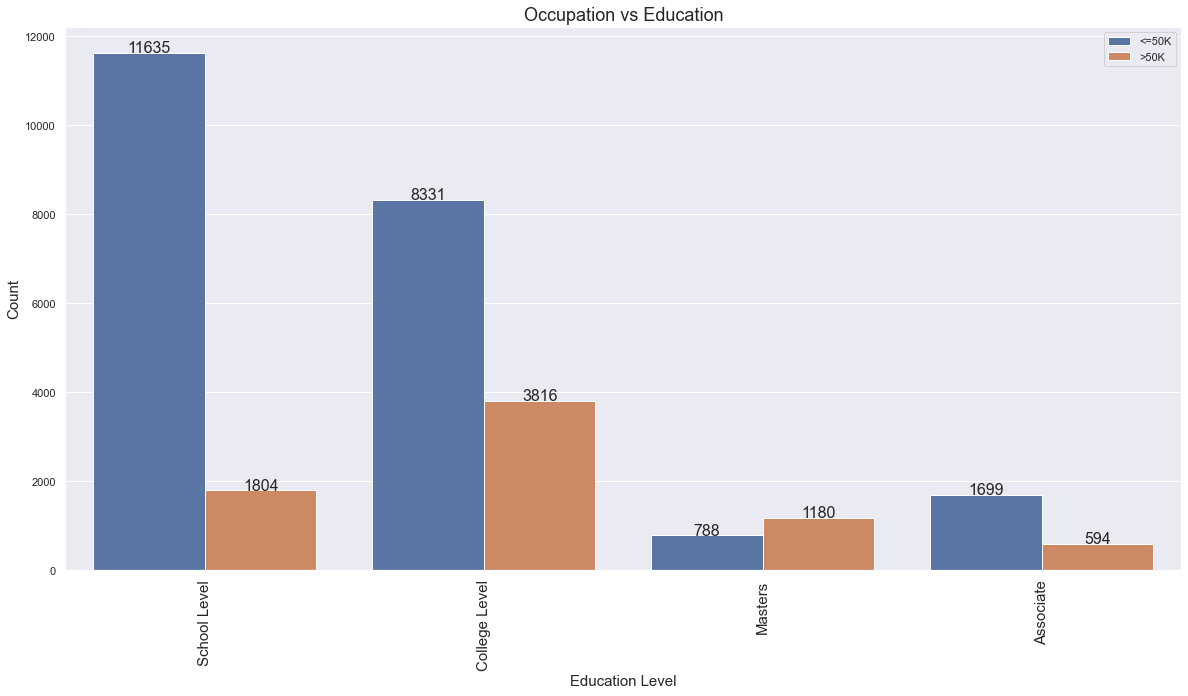

In [38]:
# potting again
cat_plot('Education Level', hue='income');
plt.title('Occupation vs Education', fontsize=18);
plt.legend(loc='upper right');

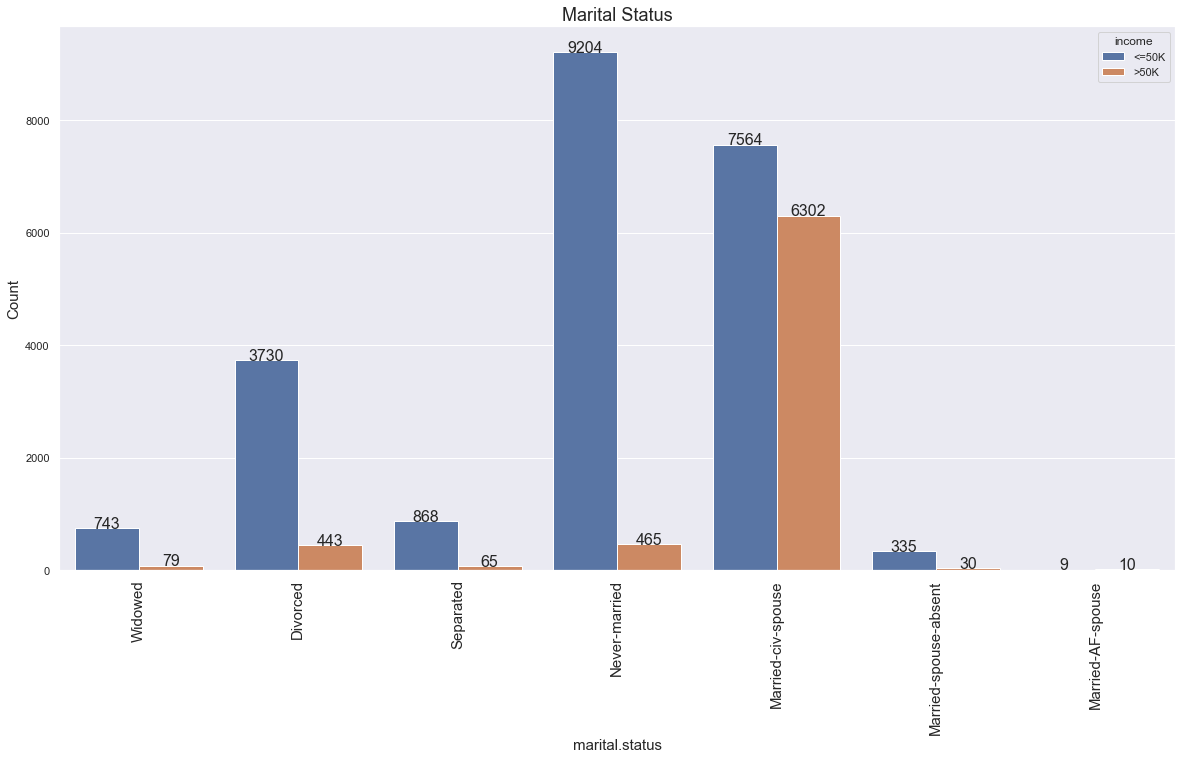

In [40]:
# checking 'marital.status' column
cat_plot('marital.status')
plt.title('Marital Status', fontsize=18);

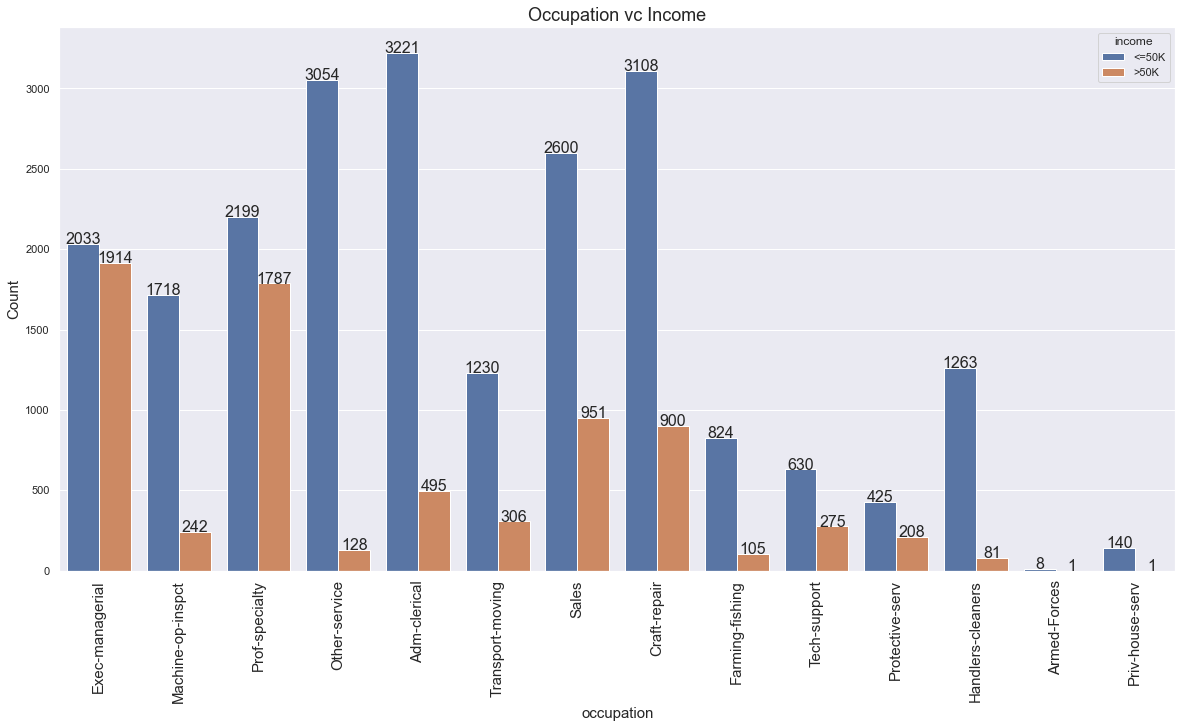

In [42]:
# checking the 'occupation' column
cat_plot('occupation')
plt.title('Occupation vc Income', fontsize=18);

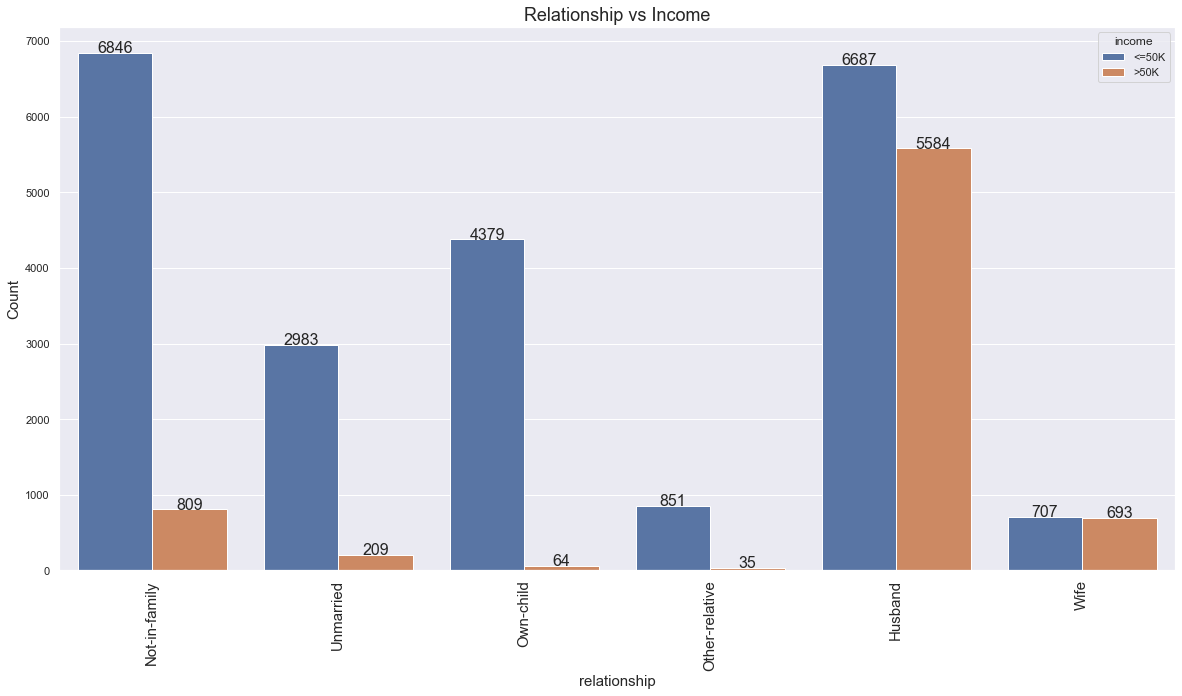

In [43]:
# checking 'relationship' column
cat_plot('relationship')
plt.title('Relationship vs Income', fontsize=18);

In gnerelar sence the relationship is not holding any information for their income. Only it is proven that `husband` or male and `wife` or female are earning same ammount. from last two bar.

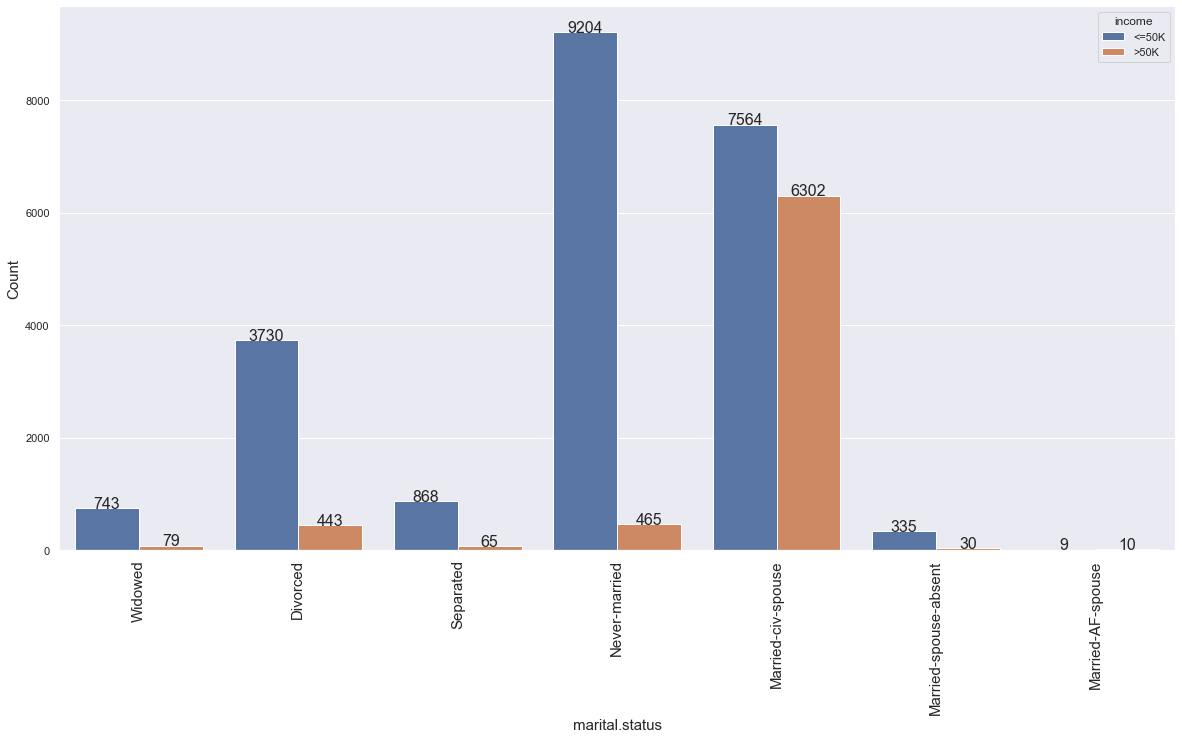

In [52]:
cat_plot('marital.status')

In [53]:
df1.drop('marital.status', axis=1, inplace=True)

In [45]:
df1.drop('relationship', axis=1, inplace=True)
print('column droped')

column droped


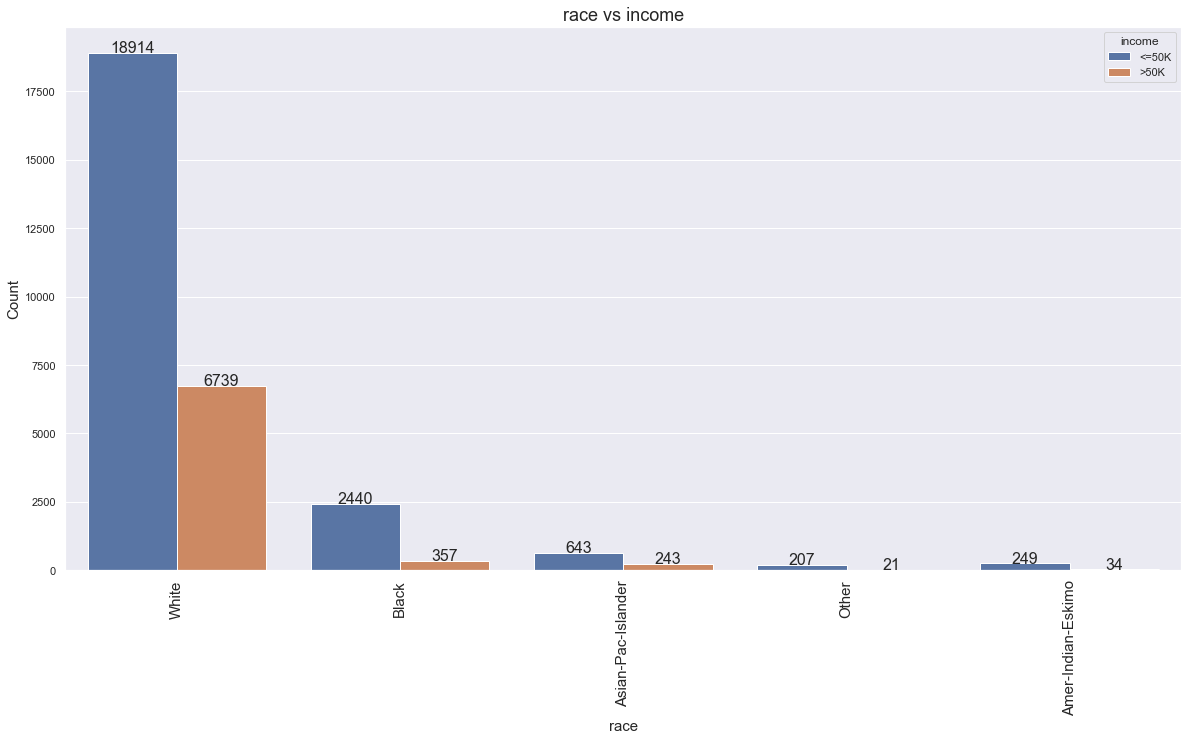

In [44]:
# checking the race column
cat_plot('race')
plt.title('race vs income', fontsize=18);

most of them are white so droping this column will be better.

In [46]:
df1.drop('race', axis=1, inplace=True)
print('column dropped')

column dropped


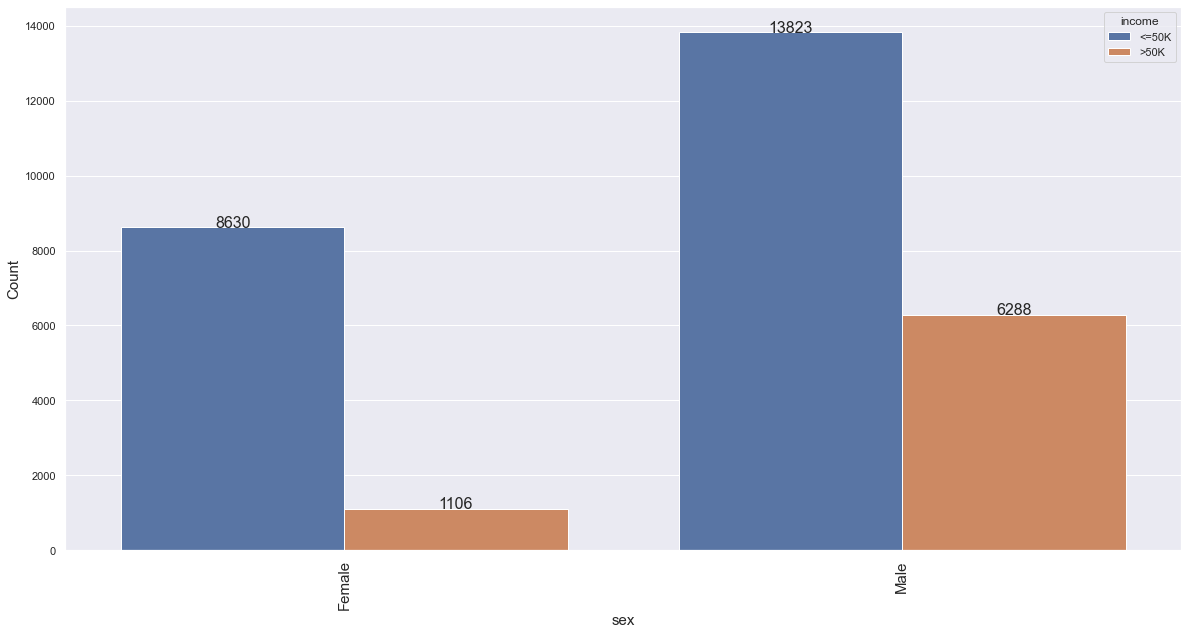

In [47]:
# seeing the sex column
cat_plot('sex', hue='income')

In [48]:
# sex is also not dependent with income 
df1.drop('sex', axis=1, inplace=True)
print('Droped')

Droped


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


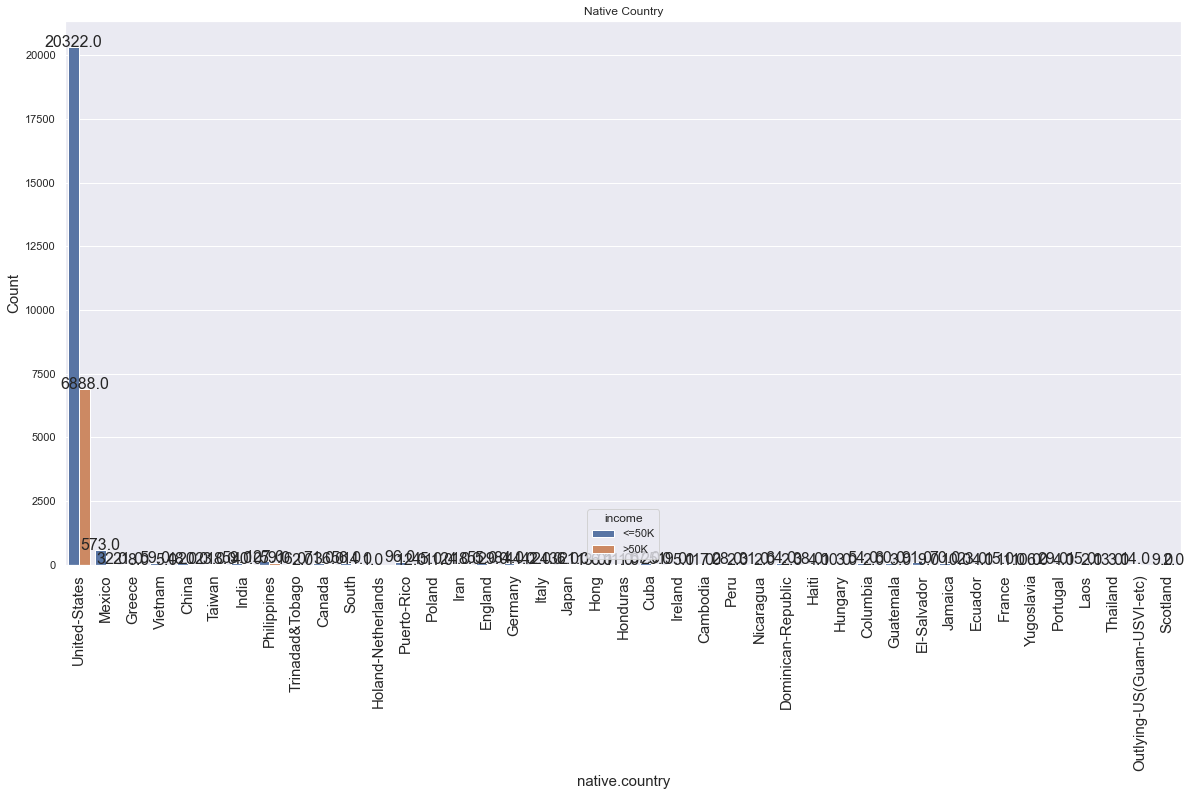

In [49]:
# cat_plot for country
cat_plot('native.country')
plt.title('Native Country');

In [50]:
# majority is on USA.
df1.drop('native.country', axis=1, inplace=True)
print('Droped')

Droped


### Now i have drope all unnecessary column, chek the what i left

In [54]:
df1.head()

,age,workclass,education,occupation,hours.per.week,income,age_groups,Education Level
1,82,Private,HS-grad,Exec-managerial,18,<=50K,81-90,School Level
3,54,Private,7th-8th,Machine-op-inspct,40,<=50K,51-60,School Level
4,41,Private,Some-college,Prof-specialty,40,<=50K,41-50,College Level
5,34,Private,HS-grad,Other-service,45,<=50K,31-40,School Level
6,38,Private,10th,Adm-clerical,40,<=50K,31-40,School Level


In [60]:
# droping the education column
df1.drop('education', axis=1, inplace=True)

In [61]:
df1.head()

,age,workclass,occupation,hours.per.week,income,age_groups,Education Level
1,82,Private,Exec-managerial,18,<=50K,81-90,School Level
3,54,Private,Machine-op-inspct,40,<=50K,51-60,School Level
4,41,Private,Prof-specialty,40,<=50K,41-50,College Level
5,34,Private,Other-service,45,<=50K,31-40,School Level
6,38,Private,Adm-clerical,40,<=50K,31-40,School Level


In [64]:
# saving the data
df1.to_csv('Census_data_clean.csv', index=False)